# **Enunciado**

### Autor José Daniel Sarmiento Blanco 2192232

Design a heat exchanger to be used as a crude oil cooler. 120 kg/s of crude oil enters to the heat exchanger at 102°C and leaves at 65°C. The coolant to be used is city water entering the tube side at 21°C with a flow rate of 65 kg/s. Pressure drop for the crude oil is limited to 150 kPa.

In [2]:
caudal_de_crudo             = 120 # kg/s
temperatura_entrada_crudo   = 102 # ºC
temperatura_salida_crudo    = 65  # ºC

temperatura_entrada_agua    = 21  # ºC
caudal_agua                 = 65  # kg/s

presion_limite_crudo        = 150_000 # Pa

In [3]:
from pyfluids import Fluid, FluidsList, Input, Mixture
from core import ThermoFormules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [4]:
temperaturas_crudo_salidas = np.arange(60, 90)
temperaturas_crudo_salidas

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])

![](./diagrama.jpeg)

## Suposicion

[presión agua](https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra.)


- Considere como material el acero al carbono, k = 60 W/m*k.
- Diámetro de tubo de 3/4 in ( 19 mm exterior y 16 mm interior ).
- Longitud de 4m

In [5]:
k_material                            = 60    # W/ m*k
diametro_interior                     = 16e-3 # m
diametro_exterior                     = 19e-3 # m
longitud                              = 4 #m               

In [6]:
presion_agua = (2) * 101_325 # Pa
presion_crudo = 413_000 # Pa

In [7]:
temperaturas_propiedades_crudo = (temperaturas_crudo_salidas + temperatura_entrada_crudo) / 2
temperaturas_propiedades_crudo

array([81. , 81.5, 82. , 82.5, 83. , 83.5, 84. , 84.5, 85. , 85.5, 86. ,
       86.5, 87. , 87.5, 88. , 88.5, 89. , 89.5, 90. , 90.5, 91. , 91.5,
       92. , 92.5, 93. , 93.5, 94. , 94.5, 95. , 95.5])

In [8]:
temperatura_propiedades_crudo = (temperatura_entrada_crudo + temperatura_salida_crudo) / 2
print(temperatura_propiedades_crudo )#+ 273.15)

cp_propiedades_crudo =  0.83 * 1000  # J/kg k

83.5


$$ \dot{Q} = (\dot{m} *C_{p})_{crudo} * (T_{c1} -T_{c2})$$

In [9]:
calores_transferencia = caudal_de_crudo * cp_propiedades_crudo * (temperatura_entrada_crudo - temperaturas_crudo_salidas)
calores_transferencia

array([4183200., 4083600., 3984000., 3884400., 3784800., 3685200.,
       3585600., 3486000., 3386400., 3286800., 3187200., 3087600.,
       2988000., 2888400., 2788800., 2689200., 2589600., 2490000.,
       2390400., 2290800., 2191200., 2091600., 1992000., 1892400.,
       1792800., 1693200., 1593600., 1494000., 1394400., 1294800.])

In [10]:
calor = caudal_de_crudo * cp_propiedades_crudo * (temperatura_entrada_crudo - temperatura_salida_crudo ) 
calor

3685200.0

In [11]:
water = Fluid(FluidsList.Water)
water.name

Water

### Suponga una temperatura de propiedades de agua de

In [12]:
state_agua = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(27),
)
state_agua.as_dict()

{'compressibility': 0.0014679646038685545,
 'conductivity': 0.6097949184333273,
 'critical_pressure': 22064000.0,
 'critical_temperature': 373.946,
 'density': 996.5612223522704,
 'dynamic_viscosity': 0.0008508970492459952,
 'enthalpy': 113375.23765002219,
 'entropy': 395.1237635503346,
 'fraction': 100,
 'freezing_temperature': None,
 'internal_energy': 113171.88837776403,
 'kinematic_viscosity': 8.538331917406425e-07,
 'max_pressure': 1000000000.0,
 'max_temperature': 1726.85,
 'min_pressure': 611.6548008968684,
 'min_temperature': 0.010000000000047748,
 'molar_mass': 0.018015268,
 'name': Water,
 'phase': Liquid,
 'prandtl': 5.8331192360367865,
 'pressure': 202650,
 'quality': None,
 'sound_speed': 1502.0731022326067,
 'specific_heat': 4180.301802554013,
 'specific_volume': 0.0010034506436439627,
 'surface_tension': None,
 'temperature': 27.0,
 'triple_pressure': 611.6548008968684,
 'triple_temperature': 0.010000000000047748,
 'units_system': SIWithCelsiusAndPercents}

In [13]:
cp_agua = state_agua.specific_heat
cp_agua

4180.301802554013

$$ \dot{Q} = (\dot{m} *C_{p})_{agua} * (T_{w1} - T_{w2})$$

In [14]:
temperatura_salida_agua = temperatura_entrada_agua + calor / (caudal_agua * cp_agua)
temperatura_salida_agua

34.56250990795588

In [15]:
calores_transferencia[18]

2390400.0

In [16]:
temperaturas_salida_agua = temperatura_entrada_agua + calores_transferencia / (caudal_agua * cp_agua)
temperaturas_salida_agua

array([36.39528152, 36.0287272 , 35.66217287, 35.29561855, 34.92906423,
       34.56250991, 34.19595559, 33.82940126, 33.46284694, 33.09629262,
       32.7297383 , 32.36318398, 31.99662966, 31.63007533, 31.26352101,
       30.89696669, 30.53041237, 30.16385805, 29.79730372, 29.4307494 ,
       29.06419508, 28.69764076, 28.33108644, 27.96453211, 27.59797779,
       27.23142347, 26.86486915, 26.49831483, 26.13176051, 25.76520618])

![](./resistencia.jpeg)

Asuma los coeficiente de trasferencia de calor

$$ \frac{1}{U_{ensuciamiento}} = \frac{1}{h_{0}} + \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + R_{f_{}agua} + R_{f_{}crudo} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} $$

$$ \frac{1}{U_{limpio}} = \frac{1}{h_{0}} + \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} $$

In [17]:
h_agua    = 5000 # kj/kg * k
h_crudo   = 800 # kj/kg * k

R_f_crudo = 0.000352 # m2 k/w
R_f_agua  = 0.000176 # m2 k/w

In [18]:
U_ensuciamiento = (
    1/h_crudo + 
    R_f_crudo + 
    (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material +
    (diametro_exterior / diametro_interior) * (1 / h_agua) +
    R_f_agua 
) ** -1
U_ensuciamiento

489.5458406052166

In [19]:
U_no_ensuciamiento = (
    1/h_crudo + 
    (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material +
    (diametro_exterior / diametro_interior) * (1 / h_agua) 
) ** -1
U_no_ensuciamiento

660.192543934851

In [20]:
diferencia_temperatura_1 = temperatura_entrada_crudo - temperatura_salida_agua
diferencia_temperatura_2 = temperatura_salida_crudo - temperatura_entrada_agua
print(diferencia_temperatura_1, diferencia_temperatura_2)

diferencia_log_temperatura = (diferencia_temperatura_2 - diferencia_temperatura_1)/ np.log(diferencia_temperatura_2/diferencia_temperatura_1)
print(diferencia_log_temperatura)

67.43749009204413 44
54.887262211690185


In [21]:
diferencia_temperatura_crudo = temperatura_entrada_crudo - temperaturas_crudo_salidas
diferencia_temperatura_crudo

array([42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13])

In [22]:
diferencia_log_temperaturas = (diferencia_temperatura_2 - diferencia_temperatura_crudo) / np.log(diferencia_temperatura_2/diferencia_temperatura_crudo)
diferencia_log_temperaturas

array([42.99224694, 42.48234708, 41.96823475, 41.44975052, 40.92672451,
       40.39897537, 39.86630924, 39.32851844, 38.78538008, 38.23665446,
       37.68208323, 37.12138725, 36.55426426, 35.98038603, 35.39939516,
       34.81090129, 34.21447675, 33.6096513 , 32.995906  , 32.37266584,
       31.7392909 , 31.09506562, 30.43918569, 29.7707419 , 29.08869994,
       28.39187505, 27.67889953, 26.9481808 , 26.19784621, 25.42566925])

Para el calculo de las el factor de correction se uso las tables del metodo de lmtd del moodle 

In [23]:
R = (temperatura_entrada_crudo - temperatura_salida_crudo) / (temperatura_salida_agua- temperatura_entrada_agua)
R

2.728108606084446

In [24]:
P = 1 / R
P

0.3665543218366454

In [25]:
F = 0.86

In [26]:
diferencia_log_temperatura_corregida =  F * diferencia_log_temperatura

In [27]:
diferencias_log_temperatura_corregida = F * diferencia_log_temperaturas
diferencias_log_temperatura_corregida

array([36.97333237, 36.53481848, 36.09268188, 35.64678545, 35.19698308,
       34.74311882, 34.28502594, 33.82252585, 33.35542687, 32.88352284,
       32.40659158, 31.92439304, 31.43666727, 30.94313199, 30.44347983,
       29.93737511, 29.42445001, 28.90430012, 28.37647916, 27.84049262,
       27.29579017, 26.74175643, 26.17769969, 25.60283803, 25.01628195,
       24.41701255, 23.8038536 , 23.17543549, 22.53014774, 21.86607555])

In [28]:
A_f = calor / (U_ensuciamiento * diferencia_log_temperatura_corregida)
A_c = calor / (U_no_ensuciamiento * diferencia_log_temperatura_corregida)

print(A_f, A_c)

159.47686057855407 118.25524914851718


In [29]:
area_ratio =  A_f / A_c - 1
area_ratio

0.34858166319760175

Se toma como referencia las siguientes dimisiones y parámetros de diseño

In [30]:
Cl         = 1
L          = 4   # m
CTP        = 0.93 # One tube pass
PitchRatio = 1.25

In [31]:
diametro_carcasa = 0.637 * (Cl / CTP * A_f * pow(PitchRatio, 2) * diametro_exterior/L)**(1/2) 
print(diametro_carcasa)
diametro_carcasa = 0.7
print(diametro_carcasa)

0.7186271396167857
0.7


In [32]:
numeros_tubos = 0.785 * (CTP/Cl) * (diametro_carcasa)**2 /((PitchRatio * diametro_exterior)**2)
print(numeros_tubos)

634.1930193905818


Se supone un 60 %  del diámetro de la carcasa

In [33]:
B = 0.6 * diametro_carcasa
print('espacio entre baffle', B)
B = 0.5
print('espacio entre baffle', B)

espacio entre baffle 0.42
espacio entre baffle 0.5


## Corrección método de kern

In [34]:
numeros_tubos = 640

In [35]:
T_b = (temperatura_entrada_agua + temperatura_salida_agua) / 2
print(T_b)

27.78125495397794


In [36]:
Pitch_Size              = 0.0254 # m

In [37]:
D_e = 4*(Pitch_Size**2 - np.pi*diametro_exterior**2/4)/(np.pi*diametro_exterior)
D_e

0.024233853930596717

In [38]:
C = Pitch_Size - diametro_exterior
print(C)

0.0063999999999999994


In [39]:
A_s = (0.39 * C * B) / Pitch_Size

print(A_s)

0.04913385826771654


In [40]:
G_s = caudal_de_crudo / A_s

print(G_s)

2442.307692307692


In [41]:
components = [FluidsList.nHexane, FluidsList.nOctane, FluidsList.nDecane]
fractions = [30, 40, 30]
mixture = dict(zip(components, fractions))
mixture

{nHexane: 30, nOctane: 40, nDecane: 30}

In [42]:
state_agua_kern = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(T_b),
)
state_agua_kern.as_dict()

{'compressibility': 0.0014644738083190445,
 'conductivity': 0.6110269720320316,
 'critical_pressure': 22064000.0,
 'critical_temperature': 373.946,
 'density': 996.3433167890219,
 'dynamic_viscosity': 0.000836367771464936,
 'enthalpy': 116641.02661706795,
 'entropy': 405.9901508078167,
 'fraction': 100,
 'freezing_temperature': None,
 'internal_energy': 116437.6328705613,
 'kinematic_viscosity': 8.394373278483474e-07,
 'max_pressure': 1000000000.0,
 'max_temperature': 1726.85,
 'min_pressure': 611.6548008968684,
 'min_temperature': 0.010000000000047748,
 'molar_mass': 0.018015268,
 'name': Water,
 'phase': Liquid,
 'prandtl': 5.721638142997106,
 'pressure': 202650,
 'quality': None,
 'sound_speed': 1504.02450259156,
 'specific_heat': 4180.0692815493885,
 'specific_volume': 0.001003670103617258,
 'surface_tension': None,
 'temperature': 27.781254953977964,
 'triple_pressure': 611.6548008968684,
 'triple_temperature': 0.010000000000047748,
 'units_system': SIWithCelsiusAndPercents}

In [43]:
densidad_agua_kern            = state_agua_kern.density
cp_agua_kern                  = state_agua_kern.specific_heat
viscosidad_dinamica_agua_kern = state_agua_kern.dynamic_viscosity
k_agua_kern                   = state_agua_kern.conductivity
prandtl_agua_kern             = state_agua_kern.prandtl

print(densidad_agua_kern, cp_agua_kern, viscosidad_dinamica_agua_kern, k_agua_kern, prandtl_agua_kern)

996.3433167890219 4180.0692815493885 0.000836367771464936 0.6110269720320316 5.721638142997106


In [44]:
crudo = Mixture(
    components,
    fractions=fractions,
)
estado_crudo =  crudo.with_state(
    Input.pressure(101_000),
    Input.temperature(T_b),
)
estado_crudo.as_dict()

{'compressibility': 0.006436783703957838,
 'conductivity': 0.14217900216844762,
 'critical_pressure': 2981833.4687300003,
 'critical_temperature': 298.33744539093857,
 'density': 689.7875540581897,
 'dynamic_viscosity': None,
 'enthalpy': -232835.11238757614,
 'entropy': -574.4950106366606,
 'fluids': [nHexane, nOctane, nDecane],
 'fractions': [30, 40, 30],
 'freezing_temperature': None,
 'internal_energy': -232981.53428204704,
 'kinematic_viscosity': None,
 'max_pressure': 605929364.2590215,
 'max_temperature': 394.3155003716736,
 'min_pressure': 1.5799947781094636,
 'min_temperature': -65.24557909004545,
 'molar_mass': 0.1099927925291343,
 'phase': Liquid,
 'prandtl': None,
 'pressure': 101000,
 'quality': None,
 'sound_speed': 1141.6373570898857,
 'specific_heat': 2235.7944562489474,
 'specific_volume': 0.0014497217210092503,
 'surface_tension': None,
 'temperature': 27.781254953977964,
 'triple_pressure': 1.5799947781094636,
 'triple_temperature': -65.24557909004545,
 'units_system

In [45]:
densidad_crudo_kern            = estado_crudo.density
cp_crudo_kern                  = estado_crudo.specific_heat
viscosidad_dinamica_crudo_kern = 0.001
k_crudo_kern                   = estado_crudo.conductivity
prandtl_crudo_kern             = estado_crudo.prandtl

print(densidad_crudo_kern, cp_crudo_kern, viscosidad_dinamica_crudo_kern, k_crudo_kern, prandtl_crudo_kern)

689.7875540581897 2235.7944562489474 0.001 0.14217900216844762 None


In [46]:
Re = G_s * D_e / viscosidad_dinamica_crudo_kern

print('Reynolds: ', Re)

Reynolds:  59186.52786895735


In [47]:
T_w = 1/2 * (
    (temperatura_entrada_agua + temperatura_salida_agua)/2 +
    (temperatura_entrada_crudo + temperatura_salida_crudo)/2
)
T_w

55.64062747698897

In [48]:
state_average = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(T_w),
)
state_average.as_dict()

{'compressibility': 0.0013552347549151689,
 'conductivity': 0.6467347002722287,
 'critical_pressure': 22064000.0,
 'critical_temperature': 373.946,
 'density': 985.4258657289612,
 'dynamic_viscosity': 0.0004985548423578504,
 'enthalpy': 233094.944617429,
 'entropy': 776.0879261429805,
 'fraction': 100,
 'freezing_temperature': None,
 'internal_energy': 232889.29748852298,
 'kinematic_viscosity': 5.059283094716093e-07,
 'max_pressure': 1000000000.0,
 'max_temperature': 1726.85,
 'min_pressure': 611.6548008968684,
 'min_temperature': 0.010000000000047748,
 'molar_mass': 0.018015268,
 'name': Water,
 'phase': Liquid,
 'prandtl': 3.2245626960404867,
 'pressure': 202650,
 'quality': None,
 'sound_speed': 1548.102492741577,
 'specific_heat': 4182.963260109866,
 'specific_volume': 0.0010147896810687607,
 'surface_tension': None,
 'temperature': 55.64062747698898,
 'triple_pressure': 611.6548008968684,
 'triple_temperature': 0.010000000000047748,
 'units_system': SIWithCelsiusAndPercents}

In [49]:
viscodiad_dinamica_agua_kern = state_average.dynamic_viscosity


In [50]:
h_0 = 0.36 * (D_e * G_s / viscosidad_dinamica_crudo_kern)**0.55  * (cp_crudo_kern * viscosidad_dinamica_crudo_kern / k_crudo_kern)**(1/3) * (viscosidad_dinamica_crudo_kern / viscodiad_dinamica_agua_kern)**0.14 * k_crudo_kern / D_e
h_0

2458.236773857342

In [51]:
A_tp = np.pi * diametro_interior**2/4 * numeros_tubos/2 
A_tp

0.06433981754551896

In [52]:
u_m = caudal_agua / (densidad_agua_kern * A_tp)
print(u_m)

1.0139686313062197


In [53]:
Re = densidad_agua_kern * u_m * diametro_interior / viscosidad_dinamica_agua_kern
Re

19326.634118694386

### Como el fluido es turbulento se usa correlación de  Grielinki's

In [54]:
f = (1.58*np.log(Re) - 3.28)**-2
f

0.006595445629707155

In [55]:
Nu_b = (f/2)*(Re - 1000)*prandtl_agua_kern/(1 + 12.7*(f/2)**(1/2)*(prandtl_agua_kern**(2/3) - 1))
Nu_b

132.806380665664

In [56]:
h_i = Nu_b * k_agua_kern/diametro_interior
print(h_i)

5071.767540292126


In [57]:
U_f = (
    diametro_exterior / (diametro_interior * h_i) + 
    diametro_exterior / diametro_interior * R_f_crudo + 
    diametro_exterior * np.log(diametro_exterior / diametro_interior) / (2 * k_material) + 
    1/h_i
) ** -1
U_f

1140.8768102763675

In [58]:
U_c = (
    diametro_exterior / (diametro_interior * h_i) + 
    diametro_exterior * np.log(diametro_exterior / diametro_interior) / (2 * k_material) + 
    1 / h_i
) ** -1
U_c

2180.9355424374785

In [59]:
f = np.e**(0.576 - 0.19*np.log(Re))
print(f)

N_b = longitud / B - 1 
print(N_b)

sigma = (viscosidad_dinamica_crudo_kern / viscosidad_dinamica_agua_kern)**0.14
print(sigma)

diferencia_presion = f * G_s ** 2 * (N_b + 1) * 0.39 / (sigma * 2 * densidad_agua_kern * D_e)
diferencia_presion

0.2727620456217141
7.0
1.0253316879520018


102521.13710666036

In [60]:
area = calor /(U_f * diferencia_log_temperatura)
area

58.85057916558362

In [61]:
areas = calores_transferencia / (U_f * diferencia_log_temperaturas)
areas

array([85.2863901 , 84.25504982, 83.20700204, 82.14162152, 81.05824458,
       79.95616573, 78.83463394, 77.69284839, 76.52995379, 75.34503504,
       74.13711123, 72.90512885, 71.64795404, 70.36436376, 69.05303566,
       67.71253641, 66.34130818, 64.93765293, 63.49971407, 62.0254548 ,
       60.51263253, 58.9587684 , 57.36111061, 55.71659007, 54.0217662 ,
       52.27276007, 50.465171  , 48.59397125, 46.65337136, 44.63664505])

In [62]:
muestra = areas[::5] * 10.764
muestra

array([918.02270308, 860.64816792, 798.0118653 , 728.85774194,
       651.35797657, 562.66398944])

In [63]:
data_bo_map = list(map(
    lambda x,y : (x,y),
    muestra.tolist(),
     [46600, 44300, 41600, 38500, 35000, 30900]
))

In [64]:
data = pd.DataFrame(
    data_bo_map,
    columns=['area', 'costo_total']
)
data.head()

,area,costo_total
0,918.022703,46600
1,860.648168,44300
2,798.011865,41600
3,728.857742,38500
4,651.357977,35000


In [65]:
data['costo_especifico'] = data['costo_total'] / data['area']
data.head()

,area,costo_total,costo_especifico
0,918.022703,46600,50.761272
1,860.648168,44300,51.472834
2,798.011865,41600,52.129551
3,728.857742,38500,52.822379
4,651.357977,35000,53.733893


In [100]:
data.to_excel("result.xlsx")

In [66]:
data['costo_especifico'].tolist()

[50.761271854860276,
 51.47283367514808,
 52.129550710985676,
 52.82237916230478,
 53.73389328009054,
 54.917322914057266]

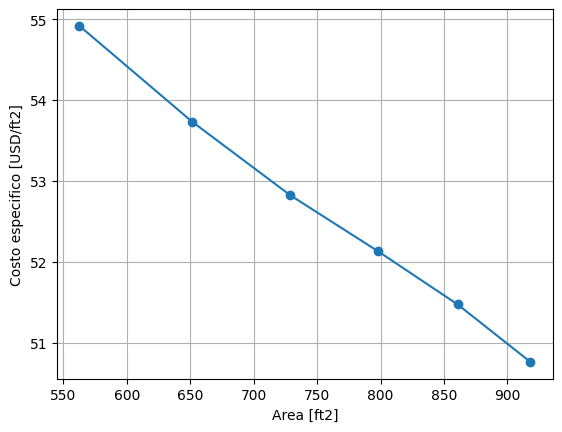

In [90]:
plt.plot(
    data['area'],
    data['costo_especifico'],
    marker='o'
)
plt.xlabel('Area [ft2]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.grid()
plt.show()

In [102]:
# Define the power law function
def power_law(x, A, B):
    return A * (x ** B)

In [103]:
# Perform curve fitting to find A and B
params, covariance = curve_fit(
    power_law, 
    data['area'].to_numpy(),
    data["costo_especifico"].to_numpy()
)

In [107]:
# Extract the values of A and B
K, n = params

m = 1 + n
print("k =", K)
print("m =", m)
print("n =", n)

k = 148.81631168365718
m = 0.8427456433761937
n = -0.1572543566238062


In [ ]:
K, n = (149.14, )

In [99]:
area = np.array([
300,
600,
900,
1200,
1500,
])
costo_total = np.array([
18100,
32600,
46000,
58800,
71000,
])

params, covariance = curve_fit(
    power_law, 
    area,
    costo_total
)
params

array([142.30795698,  -0.84952176])

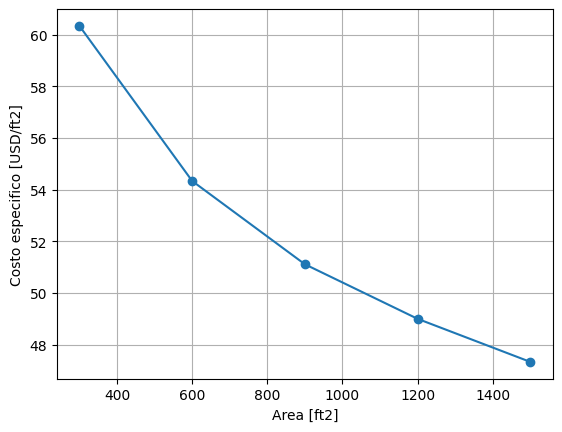

In [95]:
plt.plot(
    area,
    costo_total/area,
    marker='o'
)
plt.xlim(temperature.min(), temperature.max())
plt.xlabel('Area [ft2]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.grid()
plt.show()

In [108]:
data['costo_intercambiado'] =  K * (data['area'] ** (m))
data.head()

,area,costo_total,costo_especifico,costo_intercambiado
0,918.022703,46600,50.761272,46728.554810
1,860.648168,44300,51.472834,44254.971566
2,798.011865,41600,52.129551,41524.677893
3,728.857742,38500,52.822379,38470.715233
4,651.357977,35000,53.733893,34993.296800


In [ ]:
cost_kg_ = 5_000

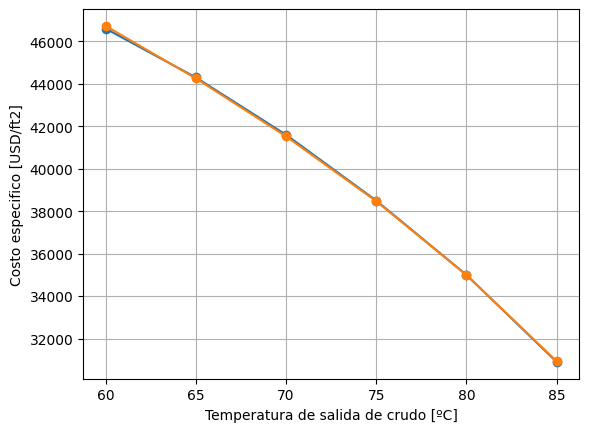

In [110]:
plt.plot(
    temperaturas_crudo_salidas[::5],
    data['costo_total'],
    marker='o'
)
plt.plot(
    temperaturas_crudo_salidas[::5],
    data['costo_intercambiado'][::],
    marker='o'
)
plt.xlabel('Temperatura de salida de crudo [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.grid()
plt.show()

In [ ]:
i = 0.14
g = 0.04
n = 5
psa = (1 - ((1 + g)**n) * (1 + i)*(-n))

### da una diferencia de presión inferior a 150kpa (85090) por ende cumple con los requerimientos


![](./matches.png)

### Resultados de la evaluación de diseño

- Material = Acero al carbono k = 60 W/mk
- Longitud del intercambiador = 4 m
- Numero de tubos = 640
- Coeficientes de convección
    - Agua : 5071.76 W/mk
    - Crudo : 2458.236773857342


    

- Diámetro de la carcasa: 0.7 m
- La distribución de los tubos en cuadrada
- Un Pitch_Size de 0.0254 m

- Temperaturas de trabajo
    - Agua :
        - Entrada : 21 º C
        - Salida  : 34.5 º C
    - Crudo :
        - Entrada : 102 ºC
        - Salida  : 65  ºC


## Referencias
- Abdulagatov, I.M., Abdulagatova, Z.Z., Grigor’ev, B.A. et al. Thermal Diffusivity, Heat Capacity, and Thermal Conductivity of Oil Reservoir Rock at High Temperatures. Int J Thermophys 42, 135 (2021). https://doi.org/10.1007/s10765-021-02878-x
- Seguros, V. (2021) Presión del Agua en Casa: Problemas habituales: Blog Verti, Verti Blog. Available at: https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra. (Accessed: 13 October 2023). 
- Bell, I.H. et al. (2014) ‘Pure and pseudo-pure fluid thermophysical property evaluation and the open-source Thermophysical Property Library coolprop’, Industrial &amp;amp; Engineering Chemistry Research, 53(6), pp. 2498–2508. doi:10.1021/ie4033999. 